In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/resumeDataset')
# Make sure to replace 'path_to_your_dataset_folder' with the actual path.
import pandas as pd
resumeDataSet = pd.read_csv('UpdatedResumeDataSet.csv')
# Replace 'your_dataset.csv' with the name of your dataset file.


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

KeyError: 'index'

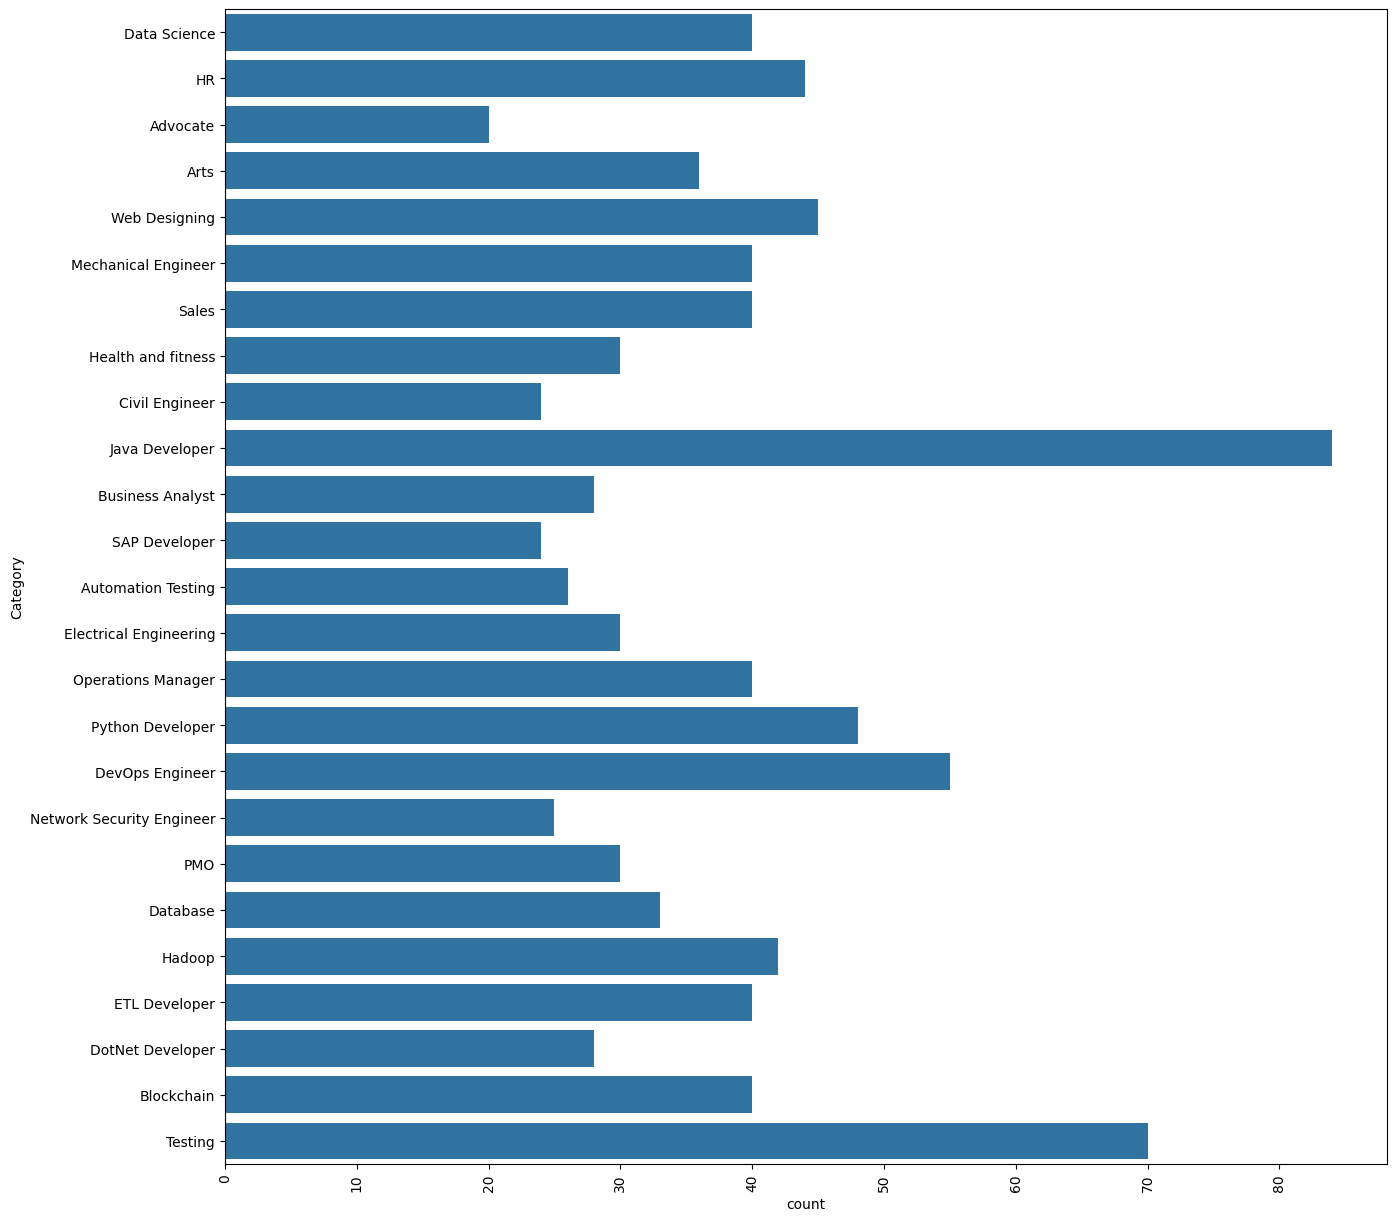

In [ ]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resumeDataSet)
plt.savefig('jobcategory_details.png')
#Pie-chart
targetCounts = resumeDataSet['Category'].value_counts().reset_index()['Category']
targetLabels  = resumeDataSet['Category'].value_counts().reset_index()['index']
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, )
plt.savefig('category_dist.png')

In [ ]:
resumeDataSet.shape
def cleanResume(resumeText):
    resumeText = re.sub('httpS+s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^x00-x7f]',r' ', resumeText)
    resumeText = re.sub('s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])
requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

(769, 1500)
(193, 1500)


In [ ]:
from sklearn import metrics

print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

# Predicting the labels for the test set
y_pred = clf.predict(X_test)

# Printing the classification report
print("Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, y_pred)))


Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.99
Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00

In [ ]:
from google.colab import files
import io

# Function to predict the category of the resume
def predict_resume_category(resume_text):
    # Clean the resume using the predefined 'cleanResume' function
    cleaned_resume = cleanResume(resume_text)

    # Transform the cleaned resume using the trained TfidfVectorizer
    resume_vec = word_vectorizer.transform([cleaned_resume])

    # Predict the category of the resume using the trained classifier
    prediction = clf.predict(resume_vec)

    # Decode the predicted category label back to its original value
    predicted_category = le.inverse_transform(prediction)[0]

    return predicted_category

# Upload the resume file
uploaded = files.upload()

# Assuming the user uploads a single resume file
filename = next(iter(uploaded))
content = uploaded[filename].decode('utf-8')

# Predict the category of the uploaded resume
predicted_category = predict_resume_category(content)
print(f"Predicted Category: {predicted_category}")


Saving asdas_resume.pdf to asdas_resume.pdf


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd3 in position 10: invalid continuation byte

In [ ]:
from google.colab import files

uploaded = files.upload()

# Assuming you uploaded a single file, get its filename
filename = next(iter(uploaded))

# # Read the content of the uploaded file
# with open(filename, 'r', encoding='utf-8', errors='ignore') as f:
#     resume_text = f.read()

# # Clean and preprocess the resume text using your function
# cleaned_resume = cleanResume(resume_text)

!pip install PyPDF2

import PyPDF2

# Read the PDF file
with open(filename, 'rb') as f:
    pdf_reader = PyPDF2.PdfReader(f)
    resume_text = ''
    for page_num in range(len(pdf_reader.pages)):
        resume_text += pdf_reader.pages[page_num].extract_text()

# Clean and preprocess the resume text
cleaned_resume = cleanResume(resume_text)

Saving xzc_resume.pdf to xzc_resume.pdf
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.6 MB/s eta 0:00:00


In [ ]:
# Transform the cleaned resume using the trained TfidfVectorizer
resume_vec = word_vectorizer.transform([cleaned_resume])

# Predict the category of the resume using the trained classifier
prediction = clf.predict(resume_vec)

# Decode the predicted category label back to its original value
print(prediction, cleaned_resume)
predicted_category = le.inverse_transform(prediction)[0]

print(f"Predicted Category: {predicted_category}")


[20] DIVYANSHMOHANRAO  div an hrao c u fullerton edu  657 525 9445  http    www linkedin com in div an h rao   Web ite  http    div an htech portfolio netlif  app   Github  http    github com div an hrao38  EDUCATION CaliforniaStateUniver it   FullertonMa 2024Ma  t erofScienc e Comput erScienc eGPA 3 90 4 00 TECHNICALSKILLS  Languag e  JavaScript P thon Java  Cloud AWS A ure Power hell  DB MSSQL Co mo DB MongoDB Redi  Couchba e  Framework  Angular D3JS  Web HTML CSS JavaScript T pe crip t React  AI ML NumP  Panda  Ten orFlo w Kera  LLM Tran former    Backend Node Expre  Quart Fla k Django  Certificate  Micro oftTechnolog A ociate Micro oft  ReactProfe ional Info     MeanStackDeveloper Info     Java WORKEXPERIENCE FrontEndEngineerIntern NewYork USAAma on Adverti ing Ama  onIn t ernalMicroF ron tE nd K at a Java crip t CSS Ma 2023 Augu t2023  DevelopedanImage lide ho wtoolu ingAma on  internalframework T pe crip t andanimation forenhancedu erengagement   IntegratedthetoolwithinAma on  Ad

In [ ]:
from joblib import dump

# Save the model
dump(clf, 'resumeClassifier.pkl')


['resumeClassifier.pkl']

In [ ]:
# prompt: dump le and wordvector

dump(le, 'labelEncoder.pkl')
dump(word_vectorizer, 'wordvectorizer.pkl')


['wordvectorizer.pkl']